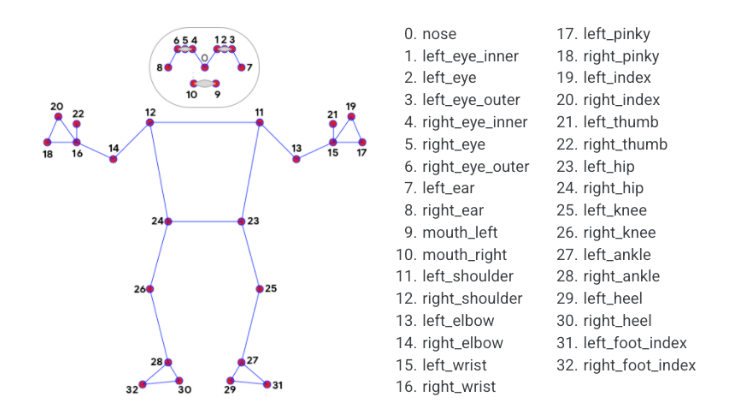

In [51]:
from IPython import display
display.Image(r"C:\Users\ayush\Desktop\img.png")

In [52]:
path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"

In [53]:
'''
This piece of code does the following things: 
1. implements fgbgmasks and Knn masks around wrists 
2. gaussian blur and techniques are used to get contours of the rope - works well 
3. regions of interests are shown with the same contours 

'''



import cv2
import mediapipe as mp
import numpy as np 

# Load the video
cap = cv2.VideoCapture(path)

#masks
fgbg = cv2.createBackgroundSubtractorMOG2()
knnfgbg = cv2.createBackgroundSubtractorKNN()


anglecount = []
# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]
                
                
        ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            
            roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]

        #converting video to graya and applying filters to make the edge detection more inline with our requiremnts
        gray = cv2.cvtColor(roi2,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(5,5),0)
        ret, thresh_img = cv2.threshold(blur,91,255,cv2.THRESH_BINARY)
        
        contours =  cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
        for c in contours:
            cv2.drawContours(roi2, [c], -1, (0,255,0), 3)

    
        if len(contours)>0:
            try:
                ellipse = cv2.fitEllipse(contours[0])
            except:
                pass
            # get the angle of rotation of the ellipse
            angle = ellipse[2]
            anglecount.append(angle)
            

        ## applying masks 
#         fgmask1 = fgbg.apply(roi1)
#         knnmask1 = knnfgbg.apply(roi1) 
        
#         fgmask2 = fgbg.apply(roi2)
#         knnmask2 = knnfgbg.apply(roi2) 
        
        # contour detection within this space 
        
        # apply edge detection within the rectangle given for the right wrist 
#         edges = cv2.Canny(roi1, 100, 200)
        
#         contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        # Draw the contours on the original frame
#         cv2.drawContours(roi2, contours, 4, (0, 255, 0), 2)
        
        
        
#         task1 = frame[320:400,200:280]
        
        # Show the frame with bounding rectangle
        cv2.imshow('frame', frame)
        cv2.imshow("roi1",roi1)
        cv2.imshow("roi2",roi2)
#         cv2.imshow("task1",task1)
        
        ##displays masks which are formed around the left arm (shows the absolute masks) 
#         cv2.imshow("FGBGMASK Left Hand",fgmask1)
#         cv2.imshow("KNNMASK Left Hand",knnmask1)
        
        #displays masks which are formed around the right arm (shows the absolute masks) 
#         cv2.imshow("FGBGMASK RIght Hand",fgmask2)
#         cv2.imshow("KNNMASK right Hand",knnmask2)
        
        
        if cv2.waitKey(5) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [109]:
len(contours)

2

In [122]:
anglecount

[153.04769897460938,
 153.04769897460938,
 153.04769897460938,
 153.04769897460938,
 153.04769897460938,
 153.04769897460938,
 153.04769897460938,
 144.33636474609375,
 130.14187622070312,
 170.75469970703125,
 159.13978576660156,
 164.184326171875,
 164.184326171875,
 148.42340087890625,
 148.42340087890625,
 148.42340087890625,
 148.42340087890625,
 148.42340087890625,
 148.42340087890625,
 148.42340087890625]

In [115]:
len(anglecount)

106

In [70]:
import numpy as np
import cv2


cap = cv2.VideoCapture(path)

while(True):
  # Capture frame-by-frame
    ret, frame = cap.read()

   # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret, thresh_img = cv2.threshold(blur,91,255,cv2.THRESH_BINARY)

    contours =  cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
    for c in contours:
        cv2.drawContours(frame, [c], -1, (0,255,0), 3)

     # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [60]:
## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2 
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


anglelist = [] 


x,y = 120,320 
x1,y1 = 120,320
x2,y2 = 120,320
cap = cv2.VideoCapture(path1)

knnfgbg = cv2.createBackgroundSubtractorKNN()

fgbg = cv2.createBackgroundSubtractorMOG2()


if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        
        if ret: 
            
            # Recolor image to RGB

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            # Make detection
            results = pose.process(image)

            # Recolor back to BGR
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Extract landmarks
            try:
                landmarks = results.pose_landmarks.landmark
                left_ankle_x.append(landmarks[27].x)
                right_ankle_x.append(landmarks[28].x)
                left_ankle_y.append(landmarks[27].y)
                right_ankle_y.append(landmarks[28].y)            
                right_hip_y.append(landmarks[23].y)            
                left_hip_y.append(landmarks[24].y)
                left_wrist_y.append(landmarks[15].y)
                left_wrist_x.append(landmarks[15].x)
                right_wrist_y.append(landmarks[16].y)
                right_wrist_x.append(landmarks[16].x)
                left_heel_y.append(landmarks[29].y)
                right_heel_y.append(landmarks[30].y)
                left_foot_y.append(landmarks[31].y)
                right_foot_y.append(landmarks[32].y)

            except:
                pass
            
            
            right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
            left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
            if left_wrist.visibility > 0:
                left_wrist_x = int(left_wrist.x * frame.shape[1])
                left_wrist_y = int(left_wrist.y * frame.shape[0])
                cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                              (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
                try:
                    roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
                except : 
                    roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
            if right_wrist.visibility > 0:
                right_wrist_x = int(right_wrist.x * frame.shape[1])
                right_wrist_y = int(right_wrist.y * frame.shape[0])
                cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                              (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)

                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]

# applying the contours on the image 

#             applying contours on right hand
            gray = cv2.cvtColor(roi2,cv2.COLOR_BGR2GRAY)
            blur = cv2.GaussianBlur(gray,(5,5),0)
            ret, thresh_img = cv2.threshold(blur,91,255,cv2.THRESH_BINARY)

            contours =  cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
            for c in contours:
                cv2.drawContours(roi2, [c], -1, (0,255,0), 3)
                
            ## applying contours on lefthand    
            gray1 = cv2.cvtColor(roi1,cv2.COLOR_BGR2GRAY)
            blur1 = cv2.GaussianBlur(gray1,(5,5),0)
            ret1, thresh_img1 = cv2.threshold(blur1,91,255,cv2.THRESH_BINARY)

            contours1 =  cv2.findContours(thresh_img1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2]
            
            
            for c1 in contours1:
                cv2.drawContours(roi1, [c1], -1, (0,255,0), 3)
            


            if len(contours)>0:
                try:
                    ellipse = cv2.fitEllipse(contours[0])
                except:
                    pass
                # get the angle of rotation of the ellipse
                angle = ellipse[2]
                anglelist.append(angle)


                
            
            # Render detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )   
            
            


            
            cv2.imshow('Mediapipe Feed', image)
            cv2.imshow("IMSHOW", roi1)
            cv2.imshow("roi2",roi2)
            if cv2.waitKey(100) & 0xFF == ord('q'):
                break

        else: 
            break

        
    cap.release()
    cv2.destroyAllWindows()
    

Text(0.5, 1.0, 'angle wrt time ')

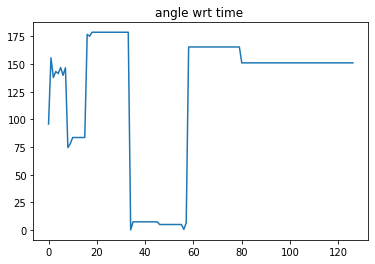

In [189]:
plt.plot(anglelist)
plt.title("angle wrt time ")

In [185]:
anglelist

[95.83026123046875,
 155.57525634765625,
 137.79742431640625,
 143.27328491210938,
 141.38189697265625,
 146.84088134765625,
 139.8318634033203,
 146.65145874023438,
 74.57238006591797,
 78.1186752319336,
 83.63641357421875,
 83.63641357421875,
 83.63641357421875,
 83.63641357421875,
 83.63641357421875,
 83.63641357421875,
 176.7879638671875,
 175.13662719726562,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 178.71324157714844,
 0.1965593546628952,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 7.488870143890381,
 5.085437297821045,
 5.085437297821045,
 5.08543729782104

In [182]:
len(anglelist)

122

In [183]:
len(anglecount)

2173

In [184]:
len(right_ankle_x)

122

In [139]:
len(anglecount)- len(right_ankle_x)

334

In [196]:
import cv2 as cv

In [66]:
# '''working on the absolute difference in the frames, get difference of the frames, lets say from the frame 5 before the 
# current one. Once we get the values the motion in the given window, try and see relative positions of the hand to 
# tell when a jump has taken place!'''

import cv2
import numpy as np 
import mediapipe as mp 

# finding absolute difference between frames: 
cap = cv2.VideoCapture(r"C:\Users\ayush\Desktop\Jump Rope Code\Media\freeFrameJump.mp4")
knnfgbg = cv2.createBackgroundSubtractorKNN()

while True: 
    ret,frame = cap.read()
    if ret: 
        knnmask = knnfgbg.apply(frame)
        
        cv2.imshow("MaskedVideo",knnmask)
        cv2.imshow("Original Video", frame)
        
        if cv2.waitKey(50) & 0xFF ==ord('q'):
            break
        
    else: 
        break 
    
    
cap.release()
cv2.destroyAllWindows()
    




In [65]:
### difference of frames: 


import cv2

# open video file
cap = cv2.VideoCapture(path)

# read the first frame
ret, prev_frame = cap.read()

# loop over video frames
while True:
    # read the next frame
    ret, next_frame = cap.read()

    # check if end of video
    if not ret:
        break

    # convert frames to grayscale
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

    # compute absolute difference between frames
    diff = cv2.absdiff(prev_gray, next_gray)

    # threshold difference image
    thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)[1]

    # apply morphological operations to remove noise and refine image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # display difference image
    cv2.imshow('Applied Morphology and Structuring element : difference', morph)
    cv2.imshow("Absolute difference image",diff)

    # update previous frame
    prev_frame = next_frame

    # check for user input to exit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# release video capture and destroy windows
cap.release()
cv2.destroyAllWindows()


In [64]:
### difference of frames: 


import cv2

# open video file
cap = cv2.VideoCapture(path)

# read the first frame
ret, prev_frame = cap.read()

knnfgbg = cv2.createBackgroundSubtractorKNN()

# loop over video frames
while True:
    # read the next frame
    ret, next_frame = cap.read()

    

    
    # check if end of video
    if not ret:
        break
    
    knnmask = knnfgbg.apply(prev_frame)
    
    # convert frames to grayscale
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)

    # compute absolute difference between frames
    diff = cv2.absdiff(prev_gray, next_gray)

    # threshold difference image
    thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)[1]

    # apply morphological operations to remove noise and refine image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # display difference image
    cv2.imshow('Applied Morphology and Structuring element : difference', morph)
    cv2.imshow("Absolute difference image",diff)
    cv2.imshow("knnmask", knnmask)
    cv2.imshow("Original Video",next_frame)

    # update previous frame
    prev_frame = next_frame

    # check for user input to exit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# release video capture and destroy windows
cap.release()
cv2.destroyAllWindows()


In [68]:
'''difference of frames in a pre specified window. '''


import cv2

# Define the coordinates of the window
#x,y,w,h = 320,325,75,75
x,y,w,h = 315,105,75,75

# Open the video capture object and read the first frame
cap = cv2.VideoCapture(path1)
ret, frame1 = cap.read()

# Convert the frame to grayscale and apply a Gaussian blur
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)

# Loop over the frames
while True:
    # Read the current frame
    ret, frame2 = cap.read()

    # Convert the frame to grayscale and apply a Gaussian blur
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

    # Compute the absolute difference between the two frames
    diff = cv2.absdiff(gray1, gray2)

    # Apply a threshold to the difference image
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]

    # Draw a rectangle around the window
    cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the original video feed and the difference image
    cv2.imshow("Original", frame2)
    cv2.imshow("Difference", thresh[y:y+h, x:x+w])

    # Update the previous frame
    gray1 = gray2.copy()

    # Check for the 'q' key to quit
    if cv2.waitKey(50) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

# code fixing for when the location of the ankles are out of bound

### adding counter, making the feed live video and making the video realtime processible 

In [62]:
'''
In these lines of code we will be adding the following things: 
    Counter 
    making the video realtime in nature 
    get the coordinated values of te wrist and make a seperate window which tracks them 

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(path)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

        
        counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = left_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

            

#         # Initialize the plot
#         plt.ion()  # Turn on interactive mode
#         fig, ax = plt.subplots()
#         line, = ax.plot([], [], 'b-')
#         ax.set_xlim(0, 10)
#         ax.set_ylim(0, 100)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Sensor Data')
#         fig.canvas.draw()

#         # Initialize the sensor data
#         sensor_data = left_ankle_y
        
#         # Main loop
#         while True:
#             # Update the plot
#             line.set_xdata(range(len(sensor_data)))
#             line.set_ydata(sensor_data)
#             ax.relim()
#             ax.autoscale_view()
#             fig.canvas.draw()
#             fig.canvas.flush_events()

#             #Wait for a short amount of time before updating again
#             time.sleep(0.1)

        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("RightWristCam", roi1)
        cv2.imshow("LeftWristCam",roi2)
        
        
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
                
        if ret ==False:
            break
        
    print(f"the final counter reading is : {counter}") 
    cap.release()
    cv2.destroyAllWindows()

the final counter reading is : 3


ValueError: setting an array element with a sequence.

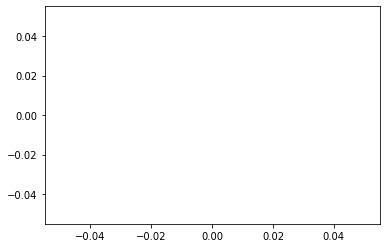

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis object
fig, ax = plt.subplots()
# Initialize an empty line object
line, = ax.plot([], [])

# Define a function to update the data and redraw the graph
def update_graph(x, y):
    line.set_data(x, y)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

# Generate some sample data


In [61]:
'''
In these lines of code we will be adding the following things: 
    Counter 
    making the video realtime in nature 
    get the coordinated values of te wrist and make a seperate window which tracks them 

'''

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_ankle_x = []
left_ankle_x = []
right_ankle_y = []
left_ankle_y = []
right_hip_y = []
left_hip_y = []
left_wrist_y = []
left_wrist_x = []
right_wrist_x = []
right_wrist_y = []
differenc_wrist_r = []
difference_ankle_r = []
left_foot_y = []
right_foot_y = []
left_heel_y = []
right_heel_y = []


cap = cv2.VideoCapture(path)

if (cap.isOpened==False):
    print ("error opening video stream")

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            left_ankle_x.append(landmarks[27].x)
            right_ankle_x.append(landmarks[28].x)
            left_ankle_y.append(landmarks[27].y)
            right_ankle_y.append(landmarks[28].y)            
            right_hip_y.append(landmarks[23].y)            
            left_hip_y.append(landmarks[24].y)
            left_wrist_y.append(landmarks[15].y)
            left_wrist_x.append(landmarks[15].x)
            right_wrist_y.append(landmarks[16].y)
            right_wrist_x.append(landmarks[16].x)
            left_heel_y.append(landmarks[29].y)
            right_heel_y.append(landmarks[30].y)
            left_foot_y.append(landmarks[31].y)
            right_foot_y.append(landmarks[32].y)
            
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

    ###obtaining the right and left hand positions and subsequently marking them on the video feed.
    
        right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
        left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST]
        
    
        
        
        # If left wrist landmark is detected, draw the bounding rectangle around it
        if left_wrist.visibility > 0:
            left_wrist_x = int(left_wrist.x * frame.shape[1])
            left_wrist_y = int(left_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (left_wrist_x - 30, left_wrist_y - 30),
                          (left_wrist_x + 40, left_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi1 = frame[left_wrist_y - 30:left_wrist_y + 30, left_wrist_x - 30:left_wrist_x + 40]
            except : 
                roi1 = frame[200:280,200:280]


            ##If right wrist landmark is detected, draw the bounding rectangle around it
        if right_wrist.visibility > 0:
            right_wrist_x = int(right_wrist.x * frame.shape[1])
            right_wrist_y = int(right_wrist.y * frame.shape[0])
            cv2.rectangle(frame, (right_wrist_x - 40, right_wrist_y - 30),
                          (right_wrist_x + 30 , right_wrist_y + 30), (0, 255, 0), 2)
            try:
                roi2 = frame[right_wrist_y - 30:right_wrist_y + 30, right_wrist_x - 30:right_wrist_x + 30]
            except: 
                roi2 = frame[200:280,200:280]

 ### adding counter looking at the left ankle        
        counter = 0 
        

        # Initialize a variable to keep track of the minimum value seen so far
        min_value = None

        # Get the first reading from the sensor
        readings = right_ankle_y

        for i in range(1, len(readings)):
            # Get the current and previous readings
            current_reading = readings[i]
            previous_reading = readings[i-1]

            # If the current reading is less than the previous reading and less than the minimum value seen so far, update the minimum value
            if current_reading < previous_reading and (min_value is None or current_reading < min_value):
                min_value = current_reading

            # If the current reading is greater than or equal to the previous reading and the minimum value has been updated, increment the counter and reset the minimum value
            elif min_value is not None:
                counter += 1
                min_value = None

            

#         # Initialize the plot
#         plt.ion()  # Turn on interactive mode
#         fig, ax = plt.subplots()
#         line, = ax.plot([], [], 'b-')
#         ax.set_xlim(0, 10)
#         ax.set_ylim(0, 100)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Sensor Data')
#         fig.canvas.draw()

#         # Initialize the sensor data
#         sensor_data = left_ankle_y
        
#         # Main loop
#         while True:
#             # Update the plot
#             line.set_xdata(range(len(sensor_data)))
#             line.set_ydata(sensor_data)
#             ax.relim()
#             ax.autoscale_view()
#             fig.canvas.draw()
#             fig.canvas.flush_events()

#             #Wait for a short amount of time before updating again
#             time.sleep(0.1)



# Generate some sample data (replace with your actual data)
#         data = left_ankle_y

#         # Initialize the counter to zero
#         newcounter = 0

#         while True:
#             # Replace this with your function that generates the data stream
#             # In this example, we just use the previously generated random data
#             data_stream = data

#             # Find the indices of the local minima using argrelmin
#             minima_indices = argrelmin(data_stream)[0]

#             # Increment the counter if there are any local minima
#             if len(minima_indices) > 0:
#                 newcounter += len(minima_indices)
#                 print("Local minima detected! Count is now:", newcounter)

#             # Wait for a short time before checking for local minima again
#             time.sleep(0.01)


        

        cv2.imshow('Mediapipe Feed', image)
        cv2.imshow("RightWristCam", roi1)
        cv2.imshow("LeftWristCam",roi2)


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        if ret ==False:
            break
        
    print(f"the final counter reading is : {counter}\n") 
#     print(f"the final counter reading is : {newcounter}") 
    
    cap.release()
    cv2.destroyAllWindows()

the final counter reading is : 12



In [13]:
left_ankle_y

[0.8660203218460083,
 0.8665133714675903,
 0.8669039607048035,
 0.8669098019599915,
 0.8670767545700073,
 0.8673416376113892,
 0.8673768043518066,
 0.8673494458198547,
 0.8672055006027222,
 0.8677762150764465,
 0.8688192367553711,
 0.8700810670852661,
 0.8703067898750305,
 0.8690420985221863,
 0.8660324215888977,
 0.8559891581535339,
 0.8326764106750488,
 0.8048642873764038,
 0.7923635244369507,
 0.7995282411575317,
 0.8136962652206421,
 0.8249103426933289,
 0.8503245115280151,
 0.8607982397079468,
 0.8667150735855103,
 0.8697225451469421,
 0.8665152788162231,
 0.8627411723136902,
 0.8612738847732544,
 0.8561646342277527,
 0.84650719165802,
 0.8430451154708862,
 0.8434373140335083,
 0.850328266620636,
 0.8604612350463867,
 0.8690719604492188,
 0.8723049163818359,
 0.8729842305183411,
 0.8701726794242859,
 0.8700064420700073,
 0.8630005717277527,
 0.8510863184928894,
 0.8471776247024536,
 0.8488631248474121,
 0.854530930519104,
 0.8623722791671753,
 0.8685047030448914,
 0.87267601490020

In [59]:
import cv2

cap = cv2.VideoCapture(path)

# Define the two regions of interest
roi1 = (100, 100, 200, 200)   # (x, y, width, height)
roi2 = (400, 100, 200, 200)

# Capture the first frame and convert it to grayscale
ret, frame = cap.read()
prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

while True:
    # Read the next frame and convert it to grayscale
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Extract the ROIs from the grayscale frames
    x1, y1, w1, h1 = roi1
    roi_gray1 = gray[y1:y1+h1, x1:x1+w1]
    roi_prev_gray1 = prev_gray[y1:y1+h1, x1:x1+w1]
    x2, y2, w2, h2 = roi2
    roi_gray2 = gray[y2:y2+h2, x2:x2+w2]
    roi_prev_gray2 = prev_gray[y2:y2+h2, x2:x2+w2]
    
    # Calculate the absolute difference between the current frame and the previous frame within the ROIs
    diff1 = cv2.absdiff(roi_gray1, roi_prev_gray1)
    diff2 = cv2.absdiff(roi_gray2, roi_prev_gray2)
    
    # Apply a threshold to the difference images to remove noise and highlight the areas with significant motion
    thresh1 = cv2.threshold(diff1, 30, 255, cv2.THRESH_BINARY)[1]
    thresh2 = cv2.threshold(diff2, 30, 255, cv2.THRESH_BINARY)[1]
    
    # Use morphological operations to further remove noise and improve the motion masks
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh1 = cv2.erode(thresh1, kernel, iterations=2)
    thresh1 = cv2.dilate(thresh1, kernel, iterations=2)
    thresh2 = cv2.erode(thresh2, kernel, iterations=2)
    thresh2 = cv2.dilate(thresh2, kernel, iterations=2)
    
    # Find contours in the motion masks and draw bounding boxes around them
    contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours1:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x1+x, y1+y), (x1+x+w, y1+y+h), (0, 0, 255), 2)
    contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours2:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x2+x, y2+y), (x2+x+w, y2+y+h), (0, 0, 255), 2)
    
    # Display the result
    cv2.imshow('Motion Detection', frame)
    cv2.imshow("roi1",roi2)
    print(roi1)
    
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    
    # Store the current frame as the previous frame for the next iteration
    prev_gray = gray

# Clean up
cap.release()
cv2.destroyAllWindows()

(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)
(100, 100, 200, 200)


In [58]:
import cv2

cap = cv2.VideoCapture(path)

# Capture the first frame and convert it to grayscale
ret, frame = cap.read()
prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

while True:
    # Read the next frame and convert it to grayscale
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(gray, prev_gray)
    
    # Apply a threshold to the difference image to remove noise and highlight the areas with significant motion
    thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)[1]
    
    # Use morphological operations to further remove noise and improve the motion mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    thresh = cv2.erode(thresh, kernel, iterations=2)
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    
    
    # Find contours in the motion mask and draw bounding boxes around them
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    # Display the result
    cv2.imshow('Motion Detection', frame)
    cv2.imshow("Difference detected", diff)
    cv2.imshow("Difference contours isolated", thresh)
    
    prev_gray = gray
    
    if cv2.waitKey(30) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# ----------------------------------------------------------------------------------------------------------------
# this is space left, working on difference of frames now from scratch, refere to optum book red ink


In [57]:

path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


## Imports 
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose



In [7]:
### chatgpt generated version of the code
'''looking at the difference of frames and seeing how they work with the use of adaptive thresholding using 
Gaussian and mean thresholding 
'''



import cv2

# Open the video file
cap = cv2.VideoCapture(path)

# Capture the first frame of the video
ret, frame1 = cap.read()
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

while True:
    # Read the next frame of the video
    ret, frame2 = cap.read()
    if not ret:
        break
    
    # Convert the current frame to grayscale
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    # Calculate the absolute difference between the frames
    diff = cv2.absdiff(gray1, gray2)
    
    # Apply a threshold to filter out small changes
    thresh1 = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    
    thresh2 = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                                   cv2.THRESH_BINARY,11,2)
    
    
    # Set the current frame as the reference frame for the next iteration
    gray1 = gray2
    
    # Display or save the resulting difference image
    cv2.imshow('Difference Image Mean Thresh', thresh1)
    cv2.imshow('Difference Image Gaussian Thresh', thresh2)
    
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


In [6]:
###### convex hull + clustering of points


"""
This code gives difference images in a box and working impottant, work with this 


"""
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_index_y = []
right_index_x = []
left_index_y = []
left_index_x = []


#get the video frames
cap = cv2.VideoCapture(path1)
ret, frame = cap.read()


if (cap.isOpened==False):
    print("error opening the video stream")
    
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        
        # Convert the frame to grayscale and apply a Gaussian blur
        gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)


        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        try: 
            right_index_y.append(landmarks[20].y)
            right_index_x.append(landmarks[20].x)
            left_index_y.append(landmarks[19].y)
            left_index_x.append(landmarks[19].x)
            
        except: 
            pass
        
        
        ## drawing the mediapipe solution onto the original video
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )
        
        ## declaring right and left index as points 
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        
        ### left index landmark detection and drawing the bounding rectangle around them 
        
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            try:
                LeftIndexROI = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30]
            except : 
                LeftIndexROI = frame[200:280,200:280]
                
        ### right index landmark detection and drawing the bounding rectangle around them 
        
        
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 30, right_index_y - 20),
                          (right_index_x + 10, right_index_y + 20), (0, 255, 0), 2)
            try:
                RightIndexROI = frame[right_index_y - 20:right_index_y + 20, right_index_x - 30:right_index_x + 10]
            except : 
                RightIndexROI = frame[200:280,200:280]
        
        


# Define the coordinates of the window
# x,y,w,h = 320,325,75,75
# x,y,w,h = 315,105,75,75




        ret, frame2 = cap.read()
    
    
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        image2.flags.writeable = False

        # Convert the frame to grayscale and apply a Gaussian blur
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

        # Compute the absolute difference between the two frames
        diff = cv2.absdiff(gray1, gray2)

        # Apply a threshold to the difference image
        thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
        # Apply a morphological operators and thresholding that 
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CROSS , kernel)


        # Draw a rectangle around the window
    #     cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.rectangle(frame2, (left_index_x - 10, left_index_y - 20),
                              (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)

        
        
        
        
        
        # Display the original video feed and the difference image
        cv2.imshow("Original", frame2)
        cv2.imshow("Difference",diff[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
        cv2.imshow("Morphed Result", thresh[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
        cv2.imshow("Mormorphed",morph[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
       
        


        # Update the previous frame
        gray1 = gray2.copy()

        # Check for the 'q' key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture object and close all windows
cap.release()

cv2.destroyAllWindows()




In [5]:
###### convex hull + clustering of points


"""
This code gives difference images in a box and working impottant, work with this 


"""
from scipy.signal import argrelmin, argrelmax
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import pandas as pd
import cv2
import time
import random
import mediapipe as mp 
import numpy as np 
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

right_index_y = []
right_index_x = []
left_index_y = []
left_index_x = []


#get the video frames
cap = cv2.VideoCapture(path1)
ret, frame = cap.read()


if (cap.isOpened==False):
    print("error opening the video stream")
    
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        

        # Recolor image to RGB
       
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        
        # Convert the frame to grayscale and apply a Gaussian blur
        gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray1 = cv2.GaussianBlur(gray1, (5, 5), 0)


        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        try: 
            right_index_y.append(landmarks[20].y)
            right_index_x.append(landmarks[20].x)
            left_index_y.append(landmarks[19].y)
            left_index_x.append(landmarks[19].x)
            
        except: 
            pass
        
        
        ## drawing the mediapipe solution onto the original video
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )
        
        ## declaring right and left index as points 
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        
        ### left index landmark detection and drawing the bounding rectangle around them 
        
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            try:
                LeftIndexROI = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30]
            except : 
                LeftIndexROI = frame[200:280,200:280]
                
        ### right index landmark detection and drawing the bounding rectangle around them 
        
        
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 30, right_index_y - 20),
                          (right_index_x + 10, right_index_y + 20), (0, 255, 0), 2)
            try:
                RightIndexROI = frame[right_index_y - 20:right_index_y + 20, right_index_x - 30:right_index_x + 10]
            except : 
                RightIndexROI = frame[200:280,200:280]
        
        


# Define the coordinates of the window
# x,y,w,h = 320,325,75,75
# x,y,w,h = 315,105,75,75




        ret, frame2 = cap.read()
    
    
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        image2.flags.writeable = False

        # Convert the frame to grayscale and apply a Gaussian blur
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.GaussianBlur(gray2, (5, 5), 0)

        # Compute the absolute difference between the two frames
        diff = cv2.absdiff(gray1, gray2)

        # Apply a threshold to the difference image
        thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
        # Apply a morphological operators and thresholding that 
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        morph = cv2.morphologyEx(thresh, cv2.MORPH_CROSS , kernel)


        # Draw a rectangle around the window
    #     cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.rectangle(frame2, (left_index_x - 10, left_index_y - 20),
                              (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)

        
        
        print(left_index_x)
        
        
        # Display the original video feed and the difference image
        cv2.imshow("Original", frame2)
        cv2.imshow("Difference",diff[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
        cv2.imshow("Morphed Result", thresh[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
        cv2.imshow("Mormorphed",morph[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 30])
       
        


        # Update the previous frame
        gray1 = gray2.copy()

        # Check for the 'q' key to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the video capture object and close all windows
cap.release()

cv2.destroyAllWindows()




524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524


 --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
path = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\JumpRopeChairAngle_Trim.mp4"
path1 = r"C:\Users\ayush\Desktop\Jump Rope Code\Media\housejumpcut.mp4"
path2 = r"C:\Users\ayush\Desktop\Jump Rope Code\JumpRope\v_JumpRope_g05_c03.avi"


In [2]:
#####3 making a tracker for the indexs 
'''This is exactly what I was looking for
This set of code allows us to track the bounding box around the indexs, now I will replace the indexs with thumb index to 
be more in line with the rope and see the result received.

'''

import cv2
import mediapipe as mp
import numpy as np 

# Load the video
cap = cv2.VideoCapture(path1)

#masks
knnfgbg = cv2.createBackgroundSubtractorKNN()

# Initialize the OpenPose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        # Read the frame
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame with OpenPose to get the landmarks
        results = pose.process(frame_rgb)
        right_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX]
        left_index = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX]
        

        # If left index landmark is detected, draw the bounding rectangle around it
        if left_index.visibility > 0:
            left_index_x = int(left_index.x * frame.shape[1])
            left_index_y = int(left_index.y * frame.shape[0])
            cv2.rectangle(frame, (left_index_x - 10, left_index_y - 20),
                          (left_index_x + 30, left_index_y + 20), (0, 255, 0), 2)
            
            roi1 = frame[left_index_y - 20:left_index_y + 20, left_index_x - 10:left_index_x + 40]
            
        # If right index landmark is detected, draw the bounding rectangle around it
        if right_index.visibility > 0:
            right_index_x = int(right_index.x * frame.shape[1])
            right_index_y = int(right_index.y * frame.shape[0])
            cv2.rectangle(frame, (right_index_x - 25, right_index_y - 20),
                          (right_index_x + 20 , right_index_y + 20), (255, 0, 0), 2)
            
            roi2 = frame[right_index_y - 25:right_index_y + 20, right_index_x - 20:right_index_x + 20]
        
        ## applying masks 
        knnmask = knnfgbg.apply(roi1) 
        
        
        # contour detection within this space 
        
        # apply edge detection within the rectangle given for the right index 
        edges = cv2.Canny(frame, 100, 200)
        
        
        
        
        
        # Show the frame with bounding rectangle
        cv2.imshow('frame', frame)
        cv2.imshow("roi1",roi1)
        cv2.imshow("roi2",roi2)
        
        
        ##displays masks which are formed around the arms 
       
        cv2.imshow("KNNMASK",knnmask)
        if cv2.waitKey(100) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
